## Drug Classification

### 1. Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import sklearn.metrics as skm

In [7]:
# Import the dataset
drug_df = pd.read_csv(r'C:\Users\hp\Desktop\drug200.csv')

# First glimpse of data
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
# General info about dataset
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


- **Age**: Age of the patient
- **Sex**: Gender of the patients
- **BP**: Blood Pressure of the patient
- **Cholesterol**: Cholesterol of the patient
- **Na_to_K**: Sodium to Potasium ratio in patient's blood
- **Drug**: Drug type given to patients

### 2. Exploratory Data Analysis

#### Age

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Density'>

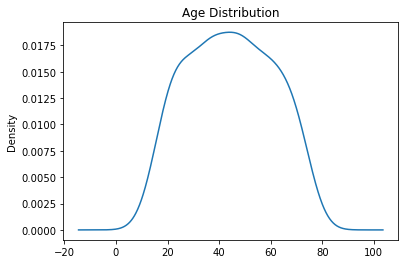

In [9]:
# Age distribution
plt.title('Age Distribution')
drug_df['Age'].plot(kind='kde')

In [10]:
print(f"Average age is {drug_df['Age'].mean()}")

Average age is 44.315


#### Gender

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='Sex', ylabel='count'>

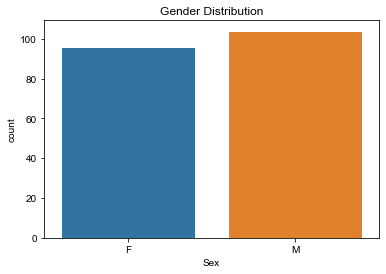

In [11]:
plt.title('Gender Distribution')
sns.set_style('darkgrid')
sns.countplot(x=drug_df.Sex)

**Takeaway**: We can see that there is almost an equal distribution of male and female.

#### Drug

In [12]:
drug_df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

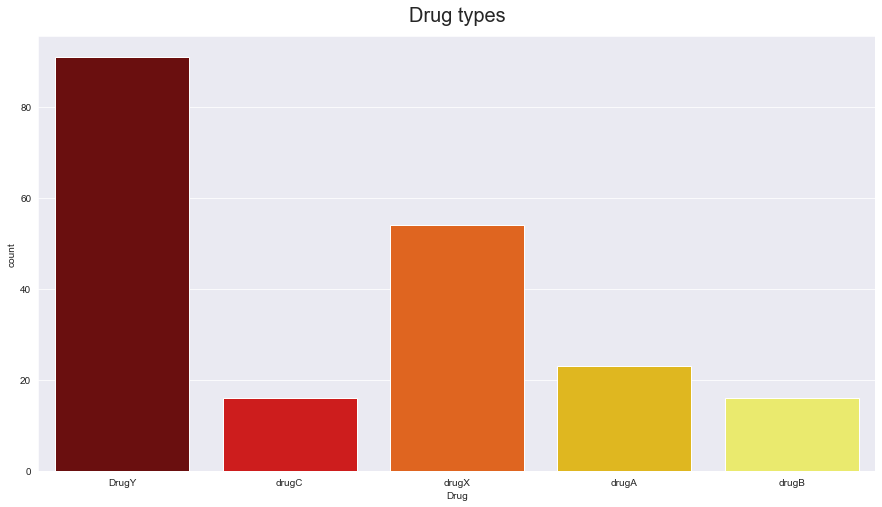

In [13]:
plt.figure(figsize=(15, 8))
plt.title('Drug types', fontsize=20, y=1.02)
sns.countplot(x = drug_df.Drug, palette='hot')
plt.show()

**Takeaway**: Drug Y is most commonly used and Drug C is least commonly used

<AxesSubplot:xlabel='Drug', ylabel='Age'>

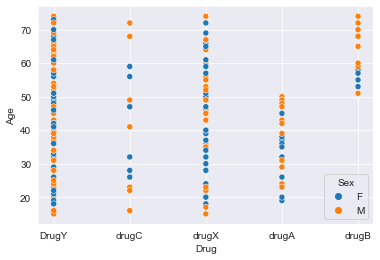

In [14]:
sns.scatterplot(x='Drug', y='Age', hue='Sex', data=drug_df)

**Takeaway**: We find that Drug B is used by people over age 50 and drug A is used by people under 50

#### Blood Pressure

<AxesSubplot:title={'center':'Blood Pressure'}, xlabel='BP', ylabel='count'>

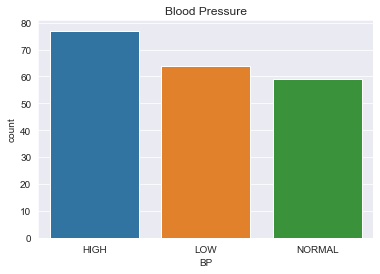

In [15]:
plt.title('Blood Pressure')
sns.countplot(x=drug_df.BP)

<AxesSubplot:xlabel='Drug', ylabel='count'>

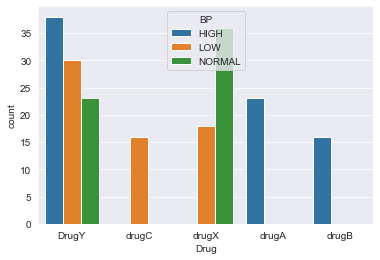

In [16]:
sns.countplot(x='Drug', hue='BP', data=drug_df)

**Takeaway**: Drug B is only used for people with high blood pressure. Drug C is used only for people with low blood pressure.

#### Cholesterol

<AxesSubplot:title={'center':'Cholesterol'}, xlabel='Cholesterol', ylabel='count'>

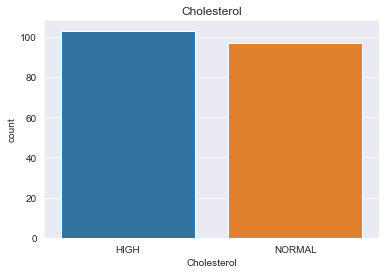

In [17]:
plt.title('Cholesterol')
sns.countplot(x = drug_df.Cholesterol)

<AxesSubplot:xlabel='Drug', ylabel='count'>

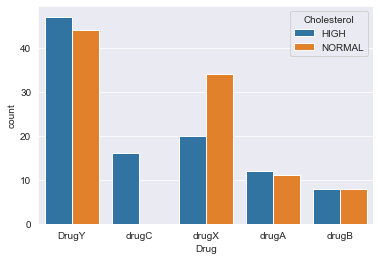

In [18]:
sns.countplot(x='Drug', hue='Cholesterol', data=drug_df)

**Takeaway**: Drug C is only used for people with high cholesterol. The rest of the drugs is used for both categories of the cholesterol level.

#### Na_to_K

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

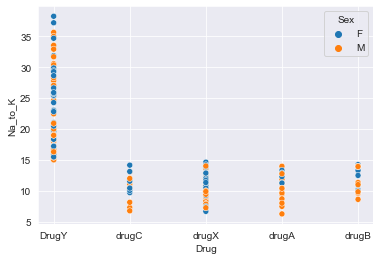

In [19]:
sns.scatterplot(x='Drug', y='Na_to_K',hue='Sex',data=drug_df)

**Takeaway**: Drug Y is used by people with Na_to_K greater than 15. The rest of the drugs is used by people with Na_to_K level below 15.

### 2. Data Preparation

In [21]:
X = drug_df.drop('Drug', axis=1)
y = drug_df['Drug']

In [22]:
X = pd.get_dummies(X, ['Age', 'BP', 'Cholesterol'])
y = pd.get_dummies(y, ['Drug'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [28]:
y_pred = rfc.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print('The Random Forest Model accuracy: ', accuracy_score(y_test, y_pred) * 100, '%')

The Random Forest Model accuracy:  100.0 %


###  Artificial Neural Network Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout ,Flatten
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [38]:
normalize = Normalization()

In [39]:
model_2 = Sequential([
    normalize,
    Flatten(input_shape=(9,)),
    Dense(32, activation='tanh'),
    Dropout(0.5),
    Dense(5, activation='sigmoid'),
])

model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

In [42]:
model_2.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=10,
          validation_data=(X_test, y_test),
           callbacks=[early_stop]
          )

Epoch 1/1000
14/14 [==============================] - 1s 18ms/step - loss: 2.5778 - accuracy: 0.1940 - val_loss: 1.8317 - val_accuracy: 0.3939
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 2.1004 - accuracy: 0.2910 - val_loss: 1.6615 - val_accuracy: 0.4091
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 1.9377 - accuracy: 0.3582 - val_loss: 1.5569 - val_accuracy: 0.4242
Epoch 4/1000
14/14 [==============================] - 0s 7ms/step - loss: 2.0248 - accuracy: 0.3657 - val_loss: 1.4839 - val_accuracy: 0.4242
Epoch 5/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8035 - accuracy: 0.3507 - val_loss: 1.3997 - val_accuracy: 0.4394
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.7529 - accuracy: 0.3731 - val_loss: 1.3327 - val_accuracy: 0.4394
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.7928 - accuracy: 0.3955 - val_loss: 1.3160 - val_accuracy: 0.4394
Epoch

14/14 [==============================] - 0s 5ms/step - loss: 0.7250 - accuracy: 0.7537 - val_loss: 0.6432 - val_accuracy: 0.7576
Epoch 59/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7290 - accuracy: 0.7313 - val_loss: 0.6321 - val_accuracy: 0.7576
Epoch 60/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.8386 - accuracy: 0.6567 - val_loss: 0.6012 - val_accuracy: 0.7727
Epoch 61/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7337 - accuracy: 0.7388 - val_loss: 0.6046 - val_accuracy: 0.7727
Epoch 62/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.7463 - val_loss: 0.5912 - val_accuracy: 0.7576
Epoch 63/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7406 - accuracy: 0.7090 - val_loss: 0.5891 - val_accuracy: 0.7576
Epoch 64/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.7463 - val_loss: 0.5677 - val_accuracy: 0.7576
Epoch 65/1000

14/14 [==============================] - 0s 5ms/step - loss: 0.4205 - accuracy: 0.8433 - val_loss: 0.3239 - val_accuracy: 0.8636
Epoch 116/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.8134 - val_loss: 0.3208 - val_accuracy: 0.9242
Epoch 117/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8731 - val_loss: 0.3116 - val_accuracy: 0.9242
Epoch 118/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.8284 - val_loss: 0.3204 - val_accuracy: 0.9242
Epoch 119/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.4384 - accuracy: 0.8284 - val_loss: 0.3199 - val_accuracy: 0.8788
Epoch 120/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3775 - accuracy: 0.8657 - val_loss: 0.3095 - val_accuracy: 0.9242
Epoch 121/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3860 - accuracy: 0.8806 - val_loss: 0.3034 - val_accuracy: 0.9242
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.9179 - val_loss: 0.2005 - val_accuracy: 0.9394
Epoch 173/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.8881 - val_loss: 0.2077 - val_accuracy: 0.9242
Epoch 174/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.9030 - val_loss: 0.1939 - val_accuracy: 0.9394
Epoch 175/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.9254 - val_loss: 0.1898 - val_accuracy: 0.9394
Epoch 176/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8881 - val_loss: 0.2010 - val_accuracy: 0.9394
Epoch 177/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2863 - accuracy: 0.9104 - val_loss: 0.1944 - val_accuracy: 0.9545
Epoch 178/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8731 - val_loss: 0.1864 - val_accuracy:

In [43]:
model_2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1670 - accuracy: 0.9545


[0.16703839600086212, 0.9545454382896423]